# PRISM: Clean-up Precipitation Clusters

The purpose of this notebook is to clean up the precipitation clusters output by a previous notebook

## Imports and Parameters

In [1]:
# this tells Jupyter to embed matplotlib plots in the notebook
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import os
import numpy as np
import pandas as pd
import datetime as dt
import geopandas as gpd
from copy import deepcopy
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import shapely as sp
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.tri as tri
import matplotlib.path as MPath
import geoplot as gplt

In [3]:
IN_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Da' \
         r'ta\JNotes\Processed\PRISM\Clustering'

In [4]:
IN_DIR2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Da' \
          r'ta\JNotes\Processed\PRISM'

Load the watershed shapefile for reference

In [5]:
WS_SHP = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\GI' \
         r'S\Shapefiles\UTM14N\Hydrology\Watersheds\Dolan_Creek_Watershed.shp'

In [6]:
DCWS = gpd.read_file( WS_SHP )
UTMCRS = DCWS.crs
UTMCRS

{'init': 'epsg:32614'}

Also load the PRISM grid cell centers

In [7]:
GPTS = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                      r'astic_CC_Recharge\Data\Weather\PRISM_Daily\AOI_PRISM_Pts.shp' )

In [8]:
display( HTML( GPTS.head().to_html() ) )

,Index1,New_Area_m,POINT_X,POINT_Y,geometry
0,662328,1.701255e+07,291619.224703,3.353093e+06,POINT (291619.225 3353093.045)
1,662329,1.696173e+07,295627.465299,3.353017e+06,POINT (295627.465 3353017.290)
2,662330,1.691092e+07,299635.652424,3.352943e+06,POINT (299635.652 3352943.009)
3,662331,1.686013e+07,303643.787128,3.352870e+06,POINT (303643.787 3352870.201)
4,662332,1.680936e+07,307651.870458,3.352799e+06,POINT (307651.870 3352798.865)


Read in the shapefiles which were saved out with the cluster configuration. We only want the clusters from the PCA analysis with the number of clusters equal to 4.

In [9]:
KeepCols = ['K-Means_4', 'geometry']

In [10]:
OutFName = os.path.normpath( os.path.join( IN_DIR, "Jan_ClusterPCA.shp") )
gpdJanCluster = gpd.read_file( OutFName )

In [11]:
OutFName = os.path.normpath( os.path.join( IN_DIR, "Feb_ClusterPCA.shp") )
gpdFebCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Mar_ClusterPCA.shp") )
gpdMarCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Apr_ClusterPCA.shp") )
gpdAprCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "May_ClusterPCA.shp") )
gpdMayCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Jun_ClusterPCA.shp") )
gpdJunCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Jul_ClusterPCA.shp") )
gpdJulCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Aug_ClusterPCA.shp") )
gpdAugCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Sep_ClusterPCA.shp") )
gpdSepCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Oct_ClusterPCA.shp") )
gpdOctCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Nov_ClusterPCA.shp") )
gpdNovCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "Dec_ClusterPCA.shp") )
gpdDecCluster = gpd.read_file( OutFName )

Trim the GeoDataFrames down to be only the columns that we need

In [12]:
gpdJanCluster = gpdJanCluster[KeepCols].copy()

In [13]:
gpdFebCluster = gpdFebCluster[KeepCols].copy()
gpdMarCluster = gpdMarCluster[KeepCols].copy()
gpdAprCluster = gpdAprCluster[KeepCols].copy()
gpdMayCluster = gpdMayCluster[KeepCols].copy()
gpdJunCluster = gpdJunCluster[KeepCols].copy()
gpdJulCluster = gpdJulCluster[KeepCols].copy()
gpdAugCluster = gpdAugCluster[KeepCols].copy()
gpdSepCluster = gpdSepCluster[KeepCols].copy()
gpdOctCluster = gpdOctCluster[KeepCols].copy()
gpdNovCluster = gpdNovCluster[KeepCols].copy()
gpdDecCluster = gpdDecCluster[KeepCols].copy()

## Manual, Interactive Cluster Smoothing

Manually smooth and reorganize these clusters to be spatially coherent.

### January

Copy the current cluster identification/delineation which was done with K-means to a new column. The column will be used to provide smoothed cluster values. Also change to be spatially consistent cluster numbering.

In [14]:
NColN = "Region_Id"
NamCoord = "coords"

In [15]:
AClustNums = [ 1, #0 East to northeast
               2, #1 southeast to southwest
               3, #2 west and/or center
               4, #3 west to northwest
              ]

In [16]:
gpdJanCluster[NColN] = gpdJanCluster[KeepCols[0]]
gpdJanCluster[NamCoord] = gpdJanCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [17]:
display( HTML( gpdJanCluster.head().to_html() ) )

,K-Means_4,geometry,Region_Id,coords
0,3,"POLYGON ((289652.464 3355071.069, 293659.782 3354982.047, 293579.718 3350745.580, 289570.602 3350822.040, 289652.464 3355071.069))",3,"[(291615.5740674287, 3352902.0437288033)]"
1,3,"POLYGON ((293659.782 3354982.047, 297667.056 3354894.499, 297588.781 3350670.593, 293579.718 3350745.580, 293659.782 3354982.047))",3,"[(295623.76790861983, 3352820.0396473967)]"
2,3,"POLYGON ((297667.056 3354894.499, 301674.285 3354808.425, 301597.790 3350597.079, 297588.781 3350670.593, 297667.056 3354894.499))",3,"[(299631.9128720951, 3352739.5089865047)]"
3,3,"POLYGON ((301674.285 3354808.425, 305681.472 3354723.824, 305606.747 3350525.037, 301597.790 3350597.079, 301674.285 3354808.425))",3,"[(303640.01000519295, 3352660.451603353)]"
4,3,"POLYGON ((305681.472 3354723.824, 309688.618 3354640.698, 309615.654 3350454.467, 305606.747 3350525.037, 305681.472 3354723.824))",3,"[(307648.0603553024, 3352582.867357904)]"


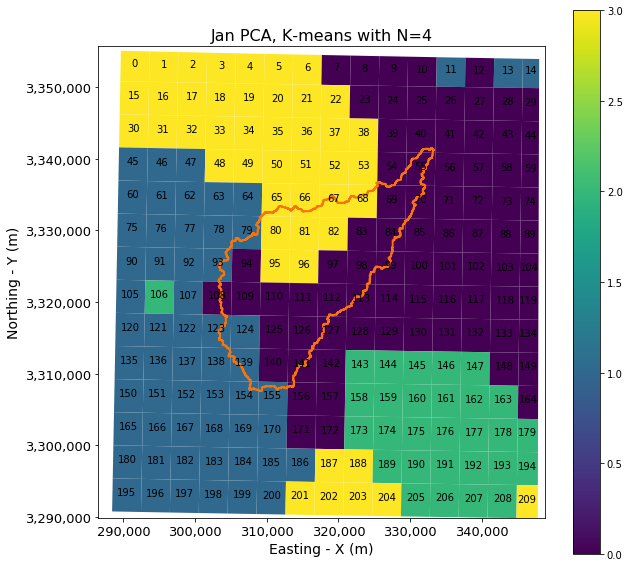

In [18]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJanCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 1
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 2
- Current cluster 3 -> Region_Id 4

In [19]:
MapDict = { 0 : 1,
            1 : 3,
            2 : 2,
            3 : 4 }

In [20]:
ReplLam = lambda oCol: MapDict[oCol]

In [21]:
gpdJanCluster[NColN] = gpdJanCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

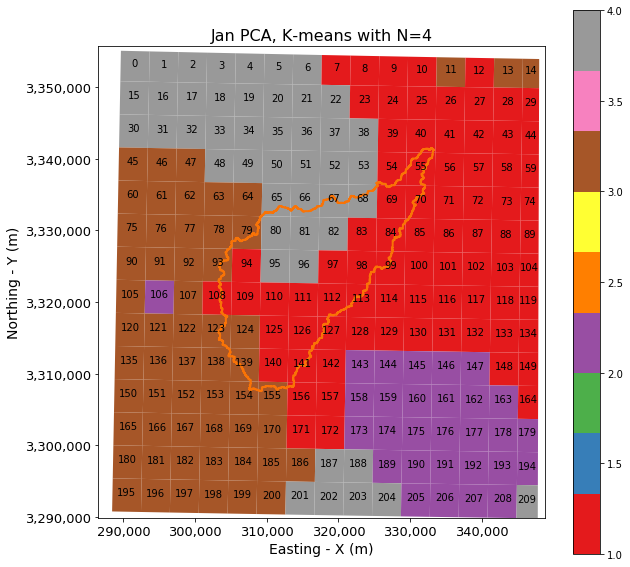

In [22]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJanCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Clearly this allowed us to change most of the grid cells. The remaining outliers can now be manually specified.

In [23]:
gpdJanCluster.at[11, NColN] = 1
gpdJanCluster.at[13, NColN] = 1
gpdJanCluster.at[14, NColN] = 1
gpdJanCluster.at[187, NColN] = 2
gpdJanCluster.at[188, NColN] = 2
gpdJanCluster.at[201, NColN] = 2
gpdJanCluster.at[202, NColN] = 2
gpdJanCluster.at[203, NColN] = 2
gpdJanCluster.at[204, NColN] = 2
gpdJanCluster.at[209, NColN] = 2
gpdJanCluster.at[106, NColN] = 3

Now need to get our GridId in with the updated region id.

In [24]:
cptRow = GPTS.loc[0]

In [25]:
AddGridPts = gpd.sjoin( gpdJanCluster, GPTS, how="inner", op='intersects')

In [26]:
display( HTML( AddGridPts.to_html() ))

,K-Means_4,geometry,Region_Id,coords,index_right,Index1,New_Area_m,POINT_X,POINT_Y
0,3,"POLYGON ((289652.464 3355071.069, 293659.782 3354982.047, 293579.718 3350745.580, 289570.602 3350822.040, 289652.464 3355071.069))",4,"[(291615.5740674287, 3352902.0437288033)]",0,662328,1.701255e+07,291619.224703,3.353093e+06
1,3,"POLYGON ((293659.782 3354982.047, 297667.056 3354894.499, 297588.781 3350670.593, 293579.718 3350745.580, 293659.782 3354982.047))",4,"[(295623.76790861983, 3352820.0396473967)]",1,662329,1.696173e+07,295627.465299,3.353017e+06
2,3,"POLYGON ((297667.056 3354894.499, 301674.285 3354808.425, 301597.790 3350597.079, 297588.781 3350670.593, 297667.056 3354894.499))",4,"[(299631.9128720951, 3352739.5089865047)]",2,662330,1.691092e+07,299635.652424,3.352943e+06
3,3,"POLYGON ((301674.285 3354808.425, 305681.472 3354723.824, 305606.747 3350525.037, 301597.790 3350597.079, 301674.285 3354808.425))",4,"[(303640.01000519295, 3352660.451603353)]",3,662331,1.686013e+07,303643.787128,3.352870e+06
4,3,"POLYGON ((305681.472 3354723.824, 309688.618 3354640.698, 309615.654 3350454.467, 305606.747 3350525.037, 305681.472 3354723.824))",4,"[(307648.0603553024, 3352582.867357904)]",4,662332,1.680936e+07,307651.870458,3.352799e+06
5,3,"POLYGON ((309688.618 3354640.698, 313695.723 3354559.045, 313624.510 3350385.370, 309615.654 3350454.467, 309688.618 3354640.698))",4,"[(311656.06496986095, 3352506.7561128577)]",5,662333,1.675861e+07,311659.903463,3.352729e+06
6,3,"POLYGON ((313695.723 3354559.045, 317702.788 3354478.866, 317633.318 3350317.744, 313624.510 3350385.370, 313695.723 3354559.045))",4,"[(315664.02489635523, 3352432.1177336527)]",6,662334,1.670787e+07,315667.887189,3.352661e+06
7,0,"POLYGON ((317702.788 3354478.866, 321709.815 3354400.160, 321642.078 3350251.591, 317633.318 3350317.744, 317702.788 3354478.866))",1,"[(319671.9411823213, 3352358.952088462)]",7,662335,1.665715e+07,319675.822685,3.352594e+06
8,0,"POLYGON ((321709.815 3354400.160, 325716.804 3354322.927, 325650.791 3350186.909, 321642.078 3350251.591, 321709.815 3354400.160))",1,"[(323679.8148753422, 3352287.259048196)]",8,662336,1.660644e+07,323683.710999,3.352528e+06
9,0,"POLYGON ((325716.804 3354322.927, 329723.758 3354247.168, 329659.458 3350123.700, 325650.791 3350186.909, 325716.804 3354322.927))",1,"[(327687.647023048, 3352217.0384865017)]",9,662337,1.655575e+07,327691.553179,3.352464e+06


In [27]:
len( AddGridPts ), len( gpdJanCluster )

(210, 210)

In [28]:
gpdJanCluster["Grid_Id"] = np.array( AddGridPts["Index1"], dtype=np.int32 )

In [29]:
len( gpdJanCluster["Grid_Id"].unique() )

210

In [30]:
GridIDList = gpdJanCluster["Grid_Id"].tolist()

In [31]:
display( HTML( gpdJanCluster.head().to_html() ) )

,K-Means_4,geometry,Region_Id,coords,Grid_Id
0,3,"POLYGON ((289652.464 3355071.069, 293659.782 3354982.047, 293579.718 3350745.580, 289570.602 3350822.040, 289652.464 3355071.069))",4,"[(291615.5740674287, 3352902.0437288033)]",662328
1,3,"POLYGON ((293659.782 3354982.047, 297667.056 3354894.499, 297588.781 3350670.593, 293579.718 3350745.580, 293659.782 3354982.047))",4,"[(295623.76790861983, 3352820.0396473967)]",662329
2,3,"POLYGON ((297667.056 3354894.499, 301674.285 3354808.425, 301597.790 3350597.079, 297588.781 3350670.593, 297667.056 3354894.499))",4,"[(299631.9128720951, 3352739.5089865047)]",662330
3,3,"POLYGON ((301674.285 3354808.425, 305681.472 3354723.824, 305606.747 3350525.037, 301597.790 3350597.079, 301674.285 3354808.425))",4,"[(303640.01000519295, 3352660.451603353)]",662331
4,3,"POLYGON ((305681.472 3354723.824, 309688.618 3354640.698, 309615.654 3350454.467, 305606.747 3350525.037, 305681.472 3354723.824))",4,"[(307648.0603553024, 3352582.867357904)]",662332


In [32]:
OutHeaders = [ NColN, "Grid_Id" ]

Now plot our completely edited cluster arrangement

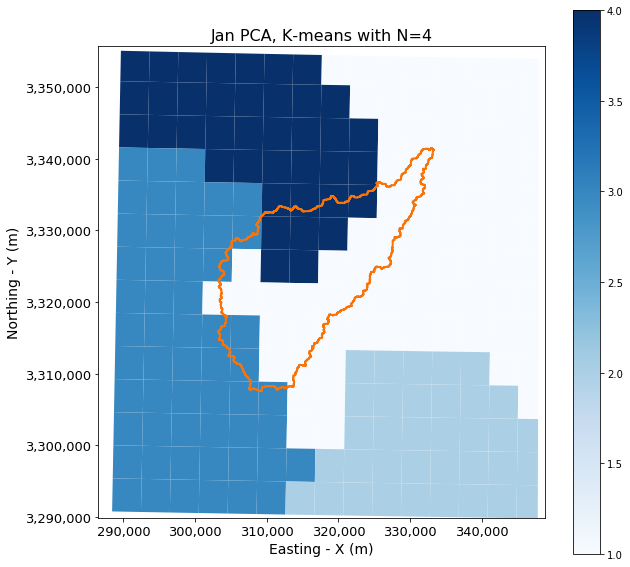

In [33]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJanCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [34]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Jan_4Regions.shp" ) )
OutShp

'\\\\augustine.space.swri.edu\\jdrive\\Groundwater\\R8937_Stochastic_CC_Recharge\\Data\\JNotes\\Processed\\PRISM\\Clustering\\Jan_4Regions.shp'

In [35]:
OutShpCols = ['K-Means_4', 'geometry', 'Region_Id', 'Grid_Id']
OutShpCols

['K-Means_4', 'geometry', 'Region_Id', 'Grid_Id']

In [36]:
gpdJanCluster[OutShpCols].to_file( OutShp )

### February

In [37]:
gpdFebCluster[NColN] = gpdFebCluster[KeepCols[0]]
gpdFebCluster[NamCoord] = gpdFebCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

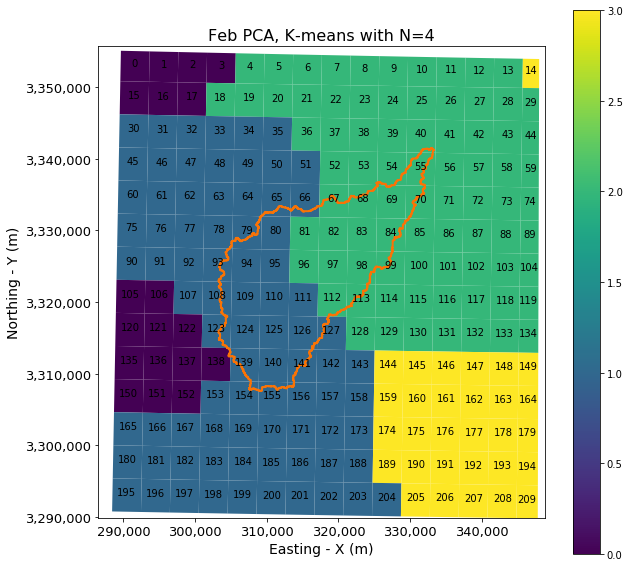

In [38]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdFebCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 4
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 1
- Current cluster 3 -> Region_Id 2

In [39]:
MapDict = { 0 : 4,
            1 : 3,
            2 : 1, 
            3 : 2 }

In [40]:
gpdFebCluster[NColN] = gpdFebCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

In [1]:
OUT_DIR = r'C:\Temp\WG_Test_Out'

In [42]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Feb_KMeans_N4.svg" ) )
OutSVG

'C:\\Temp\\WG_Test_Out\\Feb_KMeans_N4.svg'

In [43]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Feb_KMeans_N4.png" ) )
OutPNG

'C:\\Temp\\WG_Test_Out\\Feb_KMeans_N4.png'

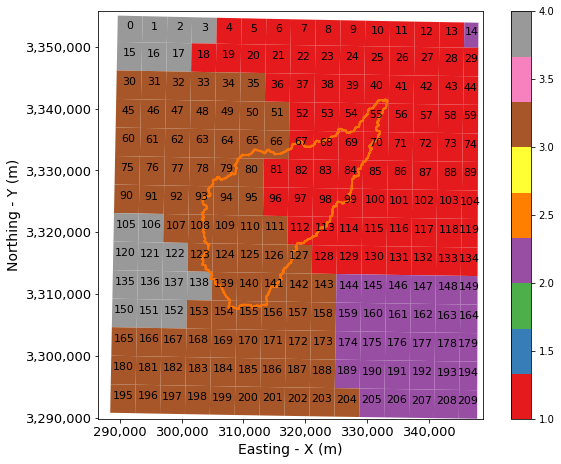

In [45]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 7.5)
ax11 = Fig1.add_subplot(111)
gpdFebCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center', fontsize=11 )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
#ax11.set_title("Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [46]:
# make the manual changes
gpdFebCluster.at[14, NColN] = 1
gpdFebCluster.at[105, NColN] = 3
gpdFebCluster.at[106, NColN] = 3
gpdFebCluster.at[120, NColN] = 3
gpdFebCluster.at[121, NColN] = 3
gpdFebCluster.at[122, NColN] = 3
gpdFebCluster.at[135, NColN] = 3
gpdFebCluster.at[136, NColN] = 3
gpdFebCluster.at[137, NColN] = 3
gpdFebCluster.at[138, NColN] = 3
gpdFebCluster.at[150, NColN] = 3
gpdFebCluster.at[151, NColN] = 3
gpdFebCluster.at[152, NColN] = 3

In [47]:
# add the Grid Id
gpdFebCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

In [48]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Feb_KMeans_N4-Clean.svg" ) )
OutSVG

'C:\\Temp\\WG_Test_Out\\Feb_KMeans_N4-Clean.svg'

In [49]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Feb_KMeans_N4-Clean.png" ) )
OutPNG

'C:\\Temp\\WG_Test_Out\\Feb_KMeans_N4-Clean.png'

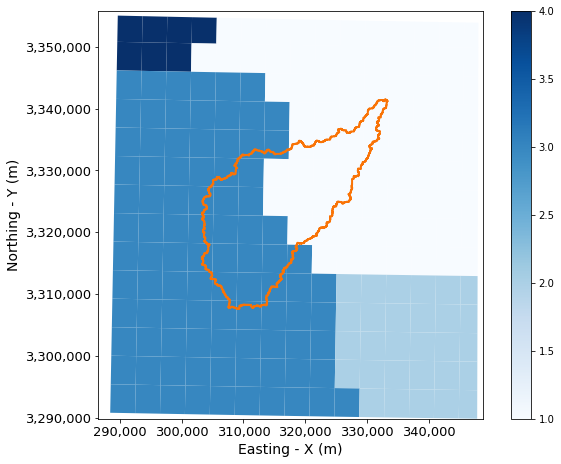

In [50]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 7.5)
ax11 = Fig1.add_subplot(111)
gpdFebCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
#ax11.set_title("Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [51]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Feb_4Regions.shp" ) )
gpdFebCluster[OutShpCols].to_file( OutShp )

### March

In [52]:
gpdMarCluster[NColN] = gpdMarCluster[KeepCols[0]]
gpdMarCluster[NamCoord] = gpdMarCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

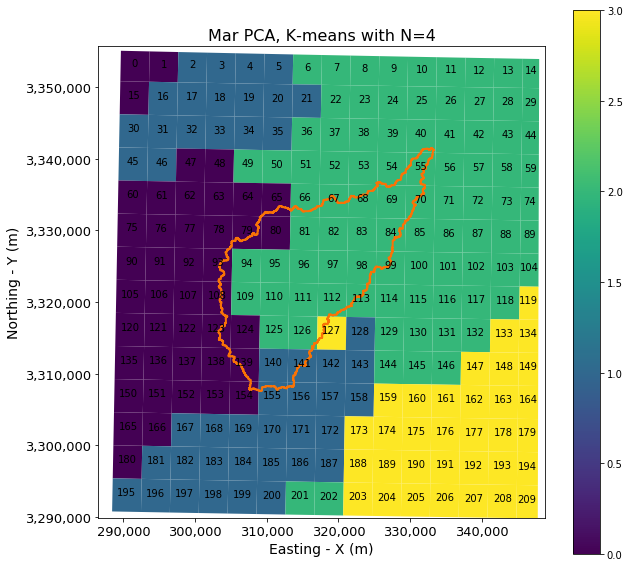

In [53]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdMarCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 4
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 1
- Current cluster 3 -> Region_Id 2

In [54]:
MapDict = { 0 : 4,
            1 : 3,
            2 : 1,
            3 : 2 }

In [55]:
gpdMarCluster[NColN] = gpdMarCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

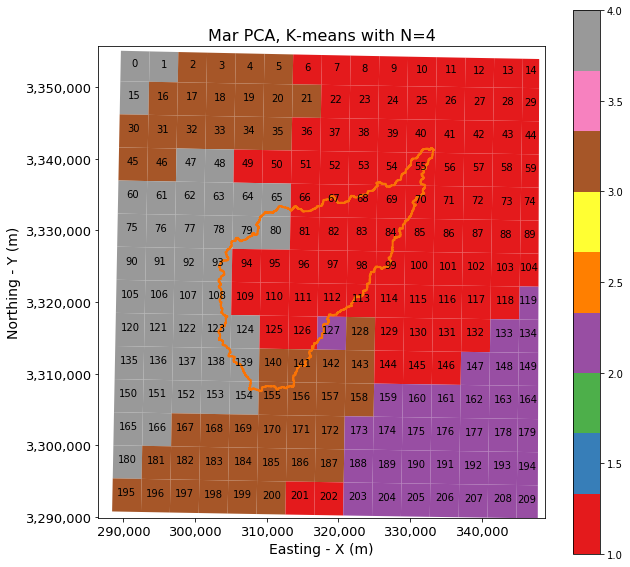

In [56]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdMarCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [57]:
# make the manual changes
gpdMarCluster.at[2, NColN] = 4
gpdMarCluster.at[3, NColN] = 4
gpdMarCluster.at[4, NColN] = 4
gpdMarCluster.at[5, NColN] = 4
gpdMarCluster.at[16, NColN] = 4
gpdMarCluster.at[17, NColN] = 4
gpdMarCluster.at[18, NColN] = 4
gpdMarCluster.at[19, NColN] = 4
gpdMarCluster.at[20, NColN] = 4
gpdMarCluster.at[21, NColN] = 4
gpdMarCluster.at[30, NColN] = 4
gpdMarCluster.at[31, NColN] = 4
gpdMarCluster.at[32, NColN] = 4
gpdMarCluster.at[33, NColN] = 4
gpdMarCluster.at[34, NColN] = 4
gpdMarCluster.at[35, NColN] = 4
gpdMarCluster.at[45, NColN] = 4
gpdMarCluster.at[46, NColN] = 4
gpdMarCluster.at[127, NColN] = 3
gpdMarCluster.at[201, NColN] = 3
gpdMarCluster.at[202, NColN] = 3

In [58]:
# add the Grid Id
gpdMarCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

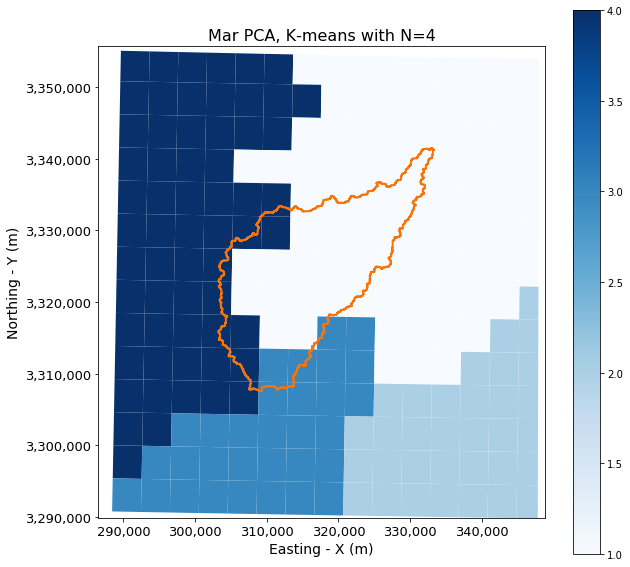

In [59]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdMarCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [60]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Mar_4Regions.shp" ) )
gpdMarCluster[OutShpCols].to_file( OutShp )

### April

In [61]:
gpdAprCluster[NColN] = gpdAprCluster[KeepCols[0]]
gpdAprCluster[NamCoord] = gpdAprCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

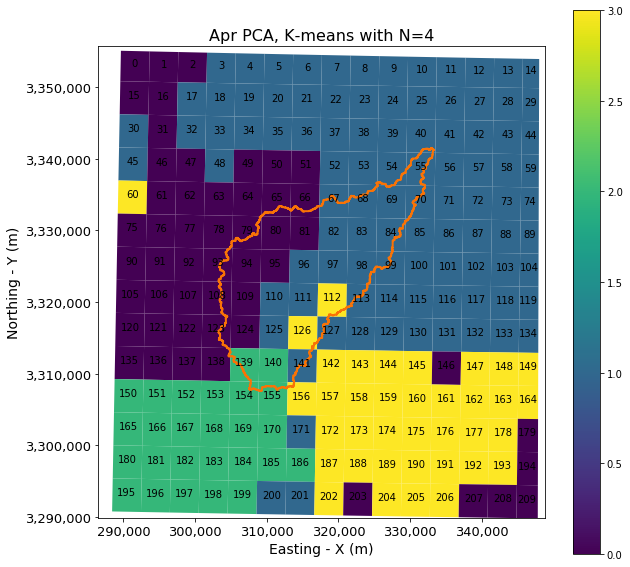

In [62]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdAprCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 4
- Current cluster 1 -> Region_Id 1
- Current cluster 2 -> Region_Id 3
- Current cluster 3 -> Region_Id 2

In [63]:
MapDict = { 0 : 4,
            1 : 1,
            2 : 3,
            3 : 2 }

In [64]:
gpdAprCluster[NColN] = gpdAprCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

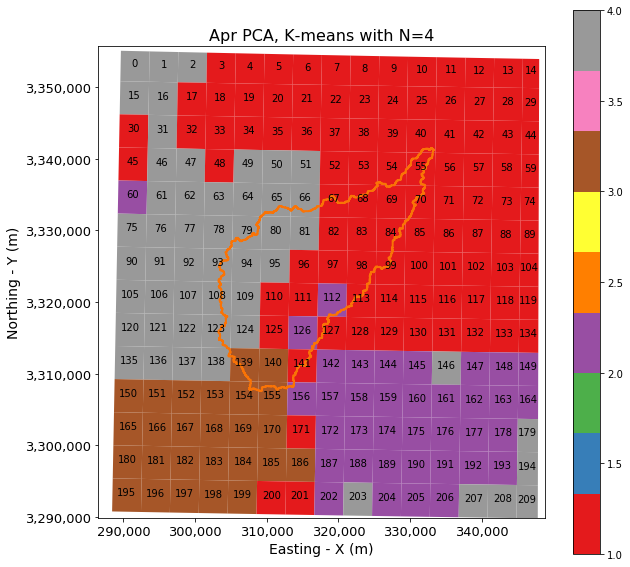

In [65]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdAprCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [66]:
# make the manual changes
gpdAprCluster.at[127, NColN] = 2
gpdAprCluster.at[141, NColN] = 3
gpdAprCluster.at[146, NColN] = 2
gpdAprCluster.at[171, NColN] = 3
gpdAprCluster.at[179, NColN] = 2
gpdAprCluster.at[194, NColN] = 2
gpdAprCluster.at[200, NColN] = 3
gpdAprCluster.at[201, NColN] = 3
gpdAprCluster.at[203, NColN] = 2
gpdAprCluster.at[207, NColN] = 2
gpdAprCluster.at[208, NColN] = 2
gpdAprCluster.at[209, NColN] = 2
gpdAprCluster.at[30, NColN] = 4
gpdAprCluster.at[45, NColN] = 4
gpdAprCluster.at[60, NColN] = 4

In [67]:
# add the Grid Id
gpdAprCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

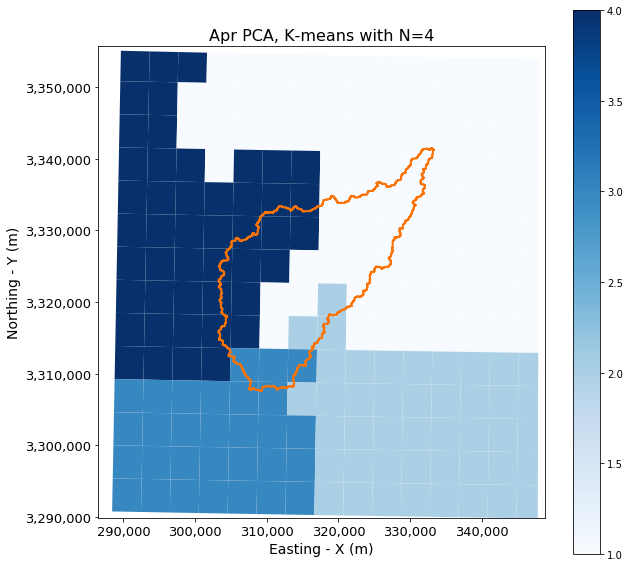

In [68]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdAprCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [69]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Apr_4Regions.shp" ) )
gpdAprCluster[OutShpCols].to_file( OutShp )

### May

In [70]:
gpdMayCluster[NColN] = gpdMayCluster[KeepCols[0]]
gpdMayCluster[NamCoord] = gpdMayCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

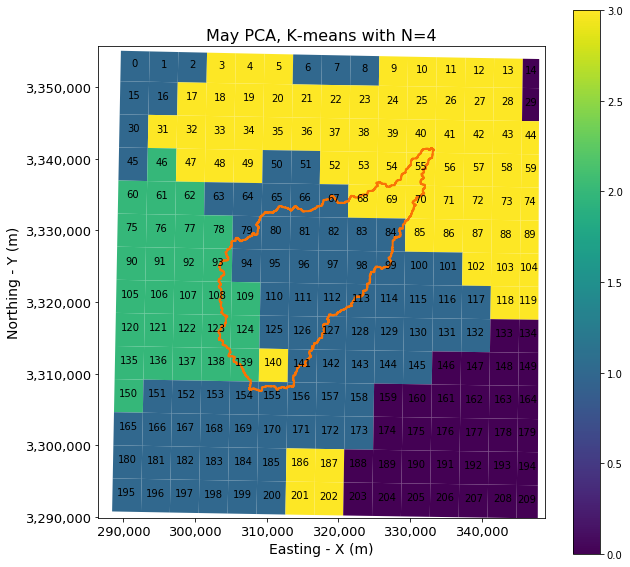

In [71]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdMayCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 2
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 4
- Current cluster 3 -> Region_Id 1

In [72]:
MapDict = { 0 : 2,
            1 : 3,
            2 : 4,
            3 : 1 }

In [73]:
gpdMayCluster[NColN] = gpdMayCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

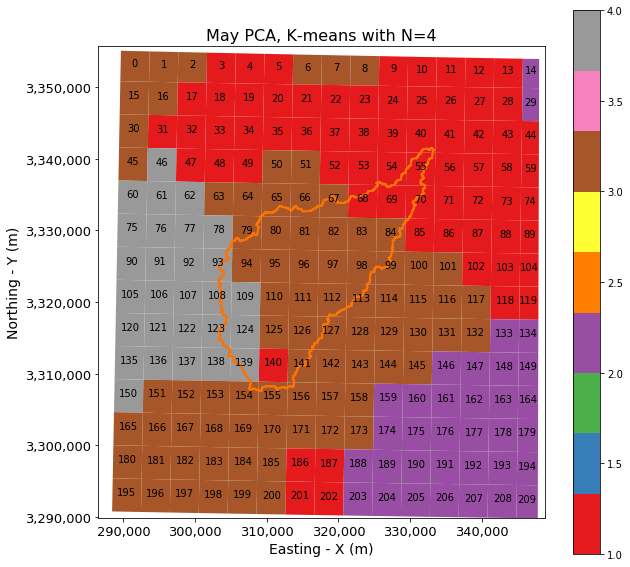

In [74]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdMayCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [75]:
# make the manual changes
gpdMayCluster.at[0, NColN] = 4
gpdMayCluster.at[1, NColN] = 4
gpdMayCluster.at[2, NColN] = 1
gpdMayCluster.at[15, NColN] = 4
gpdMayCluster.at[16, NColN] = 4
gpdMayCluster.at[30, NColN] = 4
gpdMayCluster.at[45, NColN] = 4
gpdMayCluster.at[31, NColN] = 4
gpdMayCluster.at[6, NColN] = 1
gpdMayCluster.at[7, NColN] = 1
gpdMayCluster.at[8, NColN] = 1
gpdMayCluster.at[14, NColN] = 1
gpdMayCluster.at[29, NColN] = 1
gpdMayCluster.at[140, NColN] = 3
gpdMayCluster.at[186, NColN] = 3
gpdMayCluster.at[187, NColN] = 3
gpdMayCluster.at[201, NColN] = 3
gpdMayCluster.at[202, NColN] = 3

In [76]:
# add the Grid Id
gpdMayCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

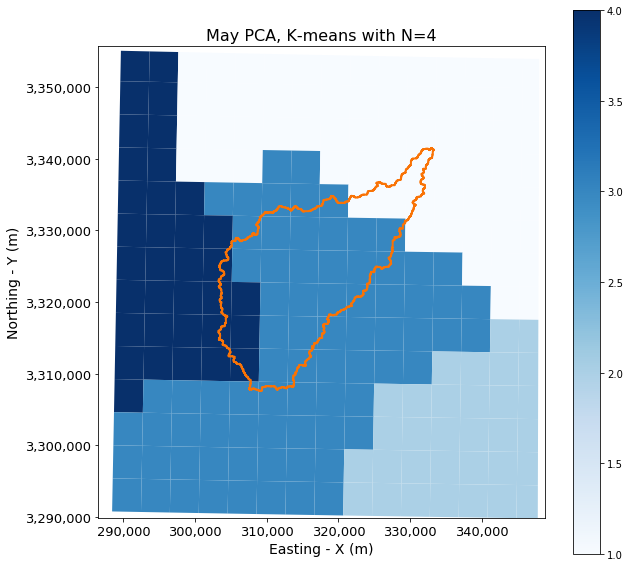

In [77]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdMayCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [78]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "May_4Regions.shp" ) )
gpdMayCluster[OutShpCols].to_file( OutShp )

### June

In [79]:
gpdJunCluster[NColN] = gpdJunCluster[KeepCols[0]]
gpdJunCluster[NamCoord] = gpdJunCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

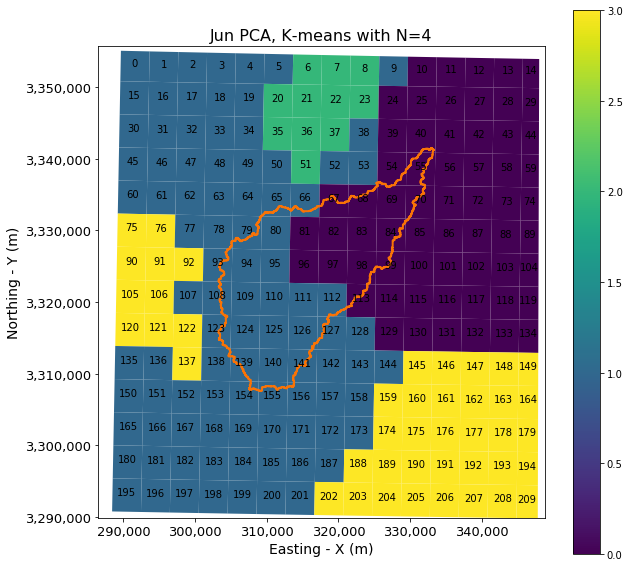

In [80]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJunCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 1
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 4
- Current cluster 3 -> Region_Id 2

In [81]:
MapDict = { 0 : 1,
            1 : 3,
            2 : 4,
            3 : 2 }

In [82]:
gpdJunCluster[NColN] = gpdJunCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

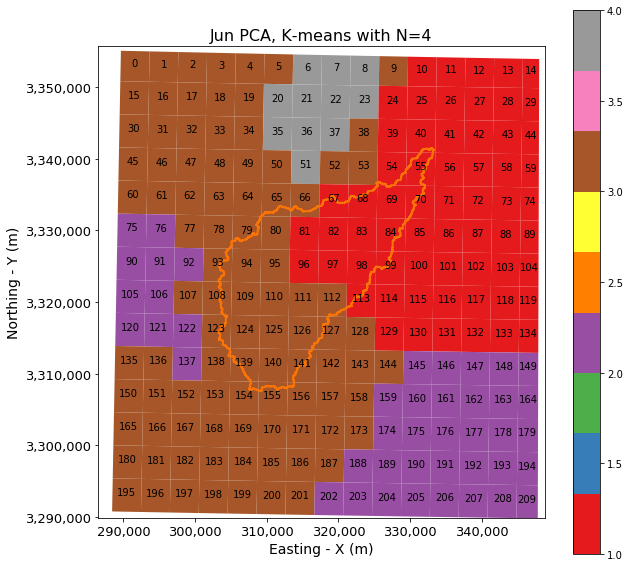

In [83]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJunCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [84]:
# make the manual changes
gpdJunCluster.at[5, NColN] = 4
gpdJunCluster.at[9, NColN] = 4
gpdJunCluster.at[38, NColN] = 4
gpdJunCluster.at[52, NColN] = 4
gpdJunCluster.at[53, NColN] = 4
gpdJunCluster.at[66, NColN] = 4
gpdJunCluster.at[50, NColN] = 4
gpdJunCluster.at[75, NColN] = 3
gpdJunCluster.at[76, NColN] = 3
gpdJunCluster.at[90, NColN] = 3
gpdJunCluster.at[91, NColN] = 3
gpdJunCluster.at[92, NColN] = 3
gpdJunCluster.at[105, NColN] = 3
gpdJunCluster.at[106, NColN] = 3
gpdJunCluster.at[120, NColN] = 3
gpdJunCluster.at[121, NColN] = 3
gpdJunCluster.at[122, NColN] = 3
gpdJunCluster.at[137, NColN] = 3

In [85]:
# add the Grid Id
gpdJunCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

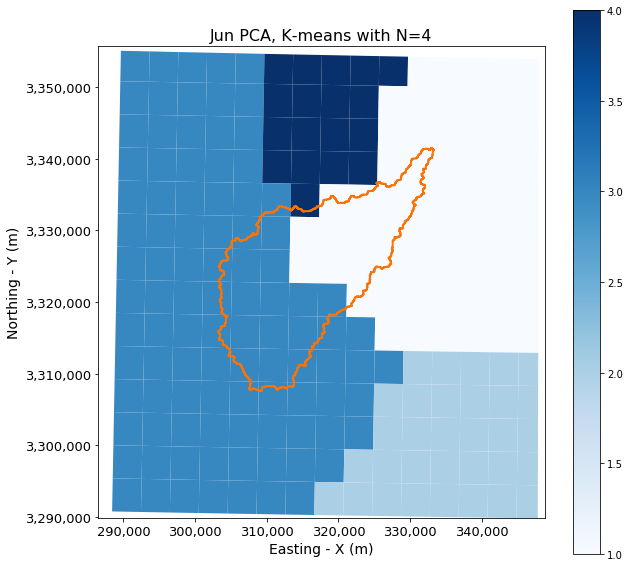

In [86]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJunCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [87]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Jun_4Regions.shp" ) )
gpdJunCluster[OutShpCols].to_file( OutShp )

### July

In [88]:
gpdJulCluster[NColN] = gpdJulCluster[KeepCols[0]]
gpdJulCluster[NamCoord] = gpdJulCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

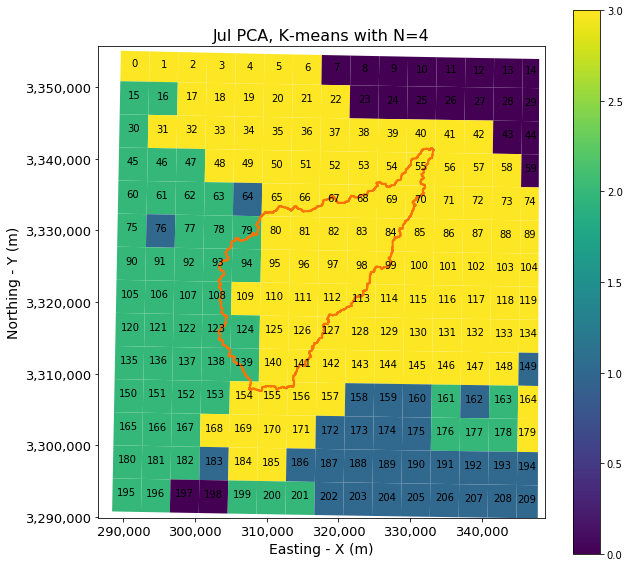

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJulCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 4
- Current cluster 1 -> Region_Id 2
- Current cluster 2 -> Region_Id 3
- Current cluster 3 -> Region_Id 1

In [90]:
MapDict = { 0 : 4,
            1 : 2,
            2 : 3,
            3 : 1 }

In [91]:
gpdJulCluster[NColN] = gpdJulCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

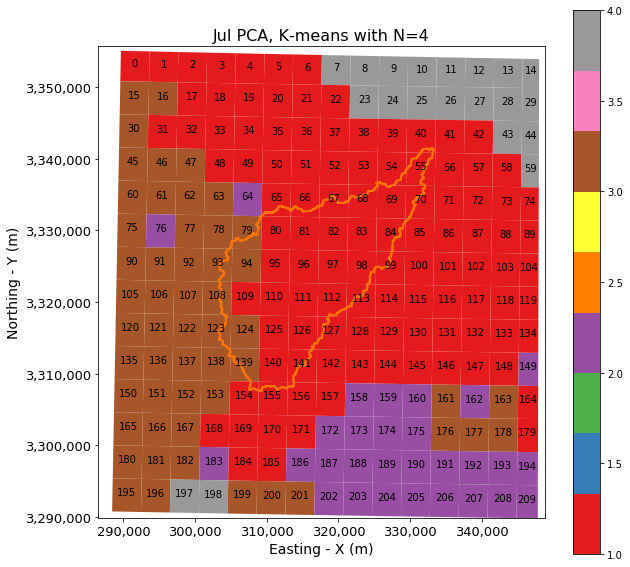

In [92]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJulCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [93]:
# make the manual changes
gpdJulCluster.at[64, NColN] = 3
gpdJulCluster.at[76, NColN] = 3
gpdJulCluster.at[183, NColN] = 3
gpdJulCluster.at[197, NColN] = 3
gpdJulCluster.at[198, NColN] = 3
gpdJulCluster.at[201, NColN] = 2
gpdJulCluster.at[161, NColN] = 2
gpdJulCluster.at[163, NColN] = 2
gpdJulCluster.at[164, NColN] = 2
gpdJulCluster.at[176, NColN] = 2
gpdJulCluster.at[177, NColN] = 2
gpdJulCluster.at[178, NColN] = 2
gpdJulCluster.at[179, NColN] = 2

In [94]:
# add the Grid Id
gpdJulCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

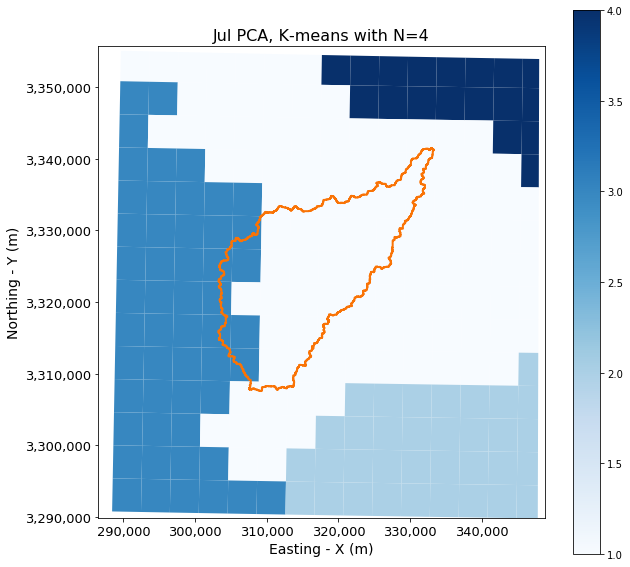

In [95]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdJulCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [96]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Jul_4Regions.shp" ) )
gpdJulCluster[OutShpCols].to_file( OutShp )

### August

In [97]:
gpdAugCluster[NColN] = gpdAugCluster[KeepCols[0]]
gpdAugCluster[NamCoord] = gpdAugCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

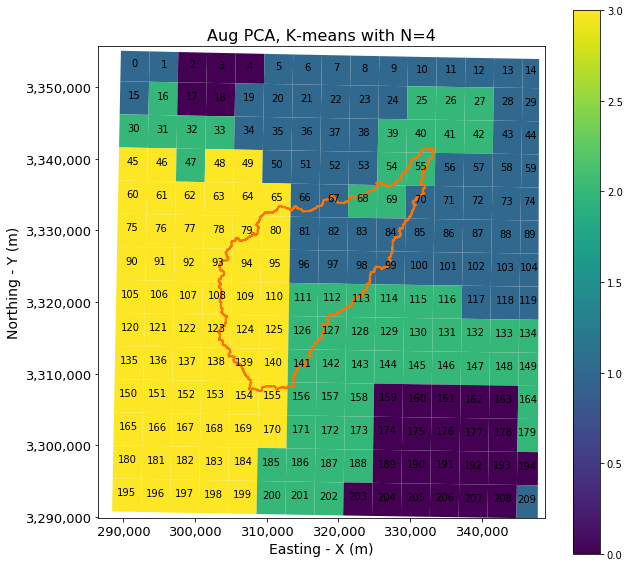

In [98]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdAugCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 3
- Current cluster 1 -> Region_Id 1
- Current cluster 2 -> Region_Id 2
- Current cluster 3 -> Region_Id 4

In [99]:
MapDict = { 0 : 3,
            1 : 1,
            2 : 2,
            3 : 4 }

In [100]:
gpdAugCluster[NColN] = gpdAugCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

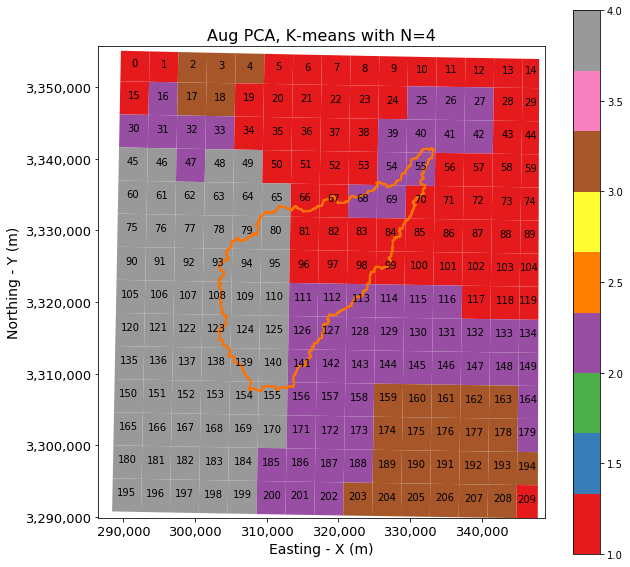

In [101]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdAugCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [102]:
# make the manual changes
gpdAugCluster.at[0, NColN] = 4
gpdAugCluster.at[1, NColN] = 4
gpdAugCluster.at[2, NColN] = 4
gpdAugCluster.at[3, NColN] = 4
gpdAugCluster.at[4, NColN] = 4
gpdAugCluster.at[15, NColN] = 4
gpdAugCluster.at[16, NColN] = 4
gpdAugCluster.at[17, NColN] = 4
gpdAugCluster.at[18, NColN] = 4
gpdAugCluster.at[30, NColN] = 4
gpdAugCluster.at[31, NColN] = 4
gpdAugCluster.at[32, NColN] = 4
gpdAugCluster.at[33, NColN] = 4
gpdAugCluster.at[47, NColN] = 4
gpdAugCluster.at[209, NColN] = 3
gpdAugCluster.at[25, NColN] = 1
gpdAugCluster.at[26, NColN] = 1
gpdAugCluster.at[27, NColN] = 1
gpdAugCluster.at[39, NColN] = 1
gpdAugCluster.at[40, NColN] = 1
gpdAugCluster.at[41, NColN] = 1
gpdAugCluster.at[42, NColN] = 1
gpdAugCluster.at[54, NColN] = 1
gpdAugCluster.at[55, NColN] = 1
gpdAugCluster.at[68, NColN] = 1
gpdAugCluster.at[69, NColN] = 1

In [103]:
# add the Grid Id
gpdAugCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

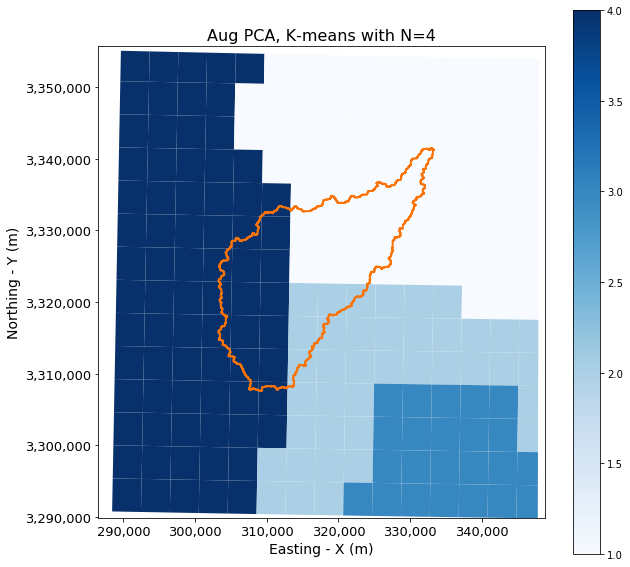

In [104]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdAugCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [105]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Aug_4Regions.shp" ) )
gpdAugCluster[OutShpCols].to_file( OutShp )

### September

In [106]:
gpdSepCluster[NColN] = gpdSepCluster[KeepCols[0]]
gpdSepCluster[NamCoord] = gpdSepCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

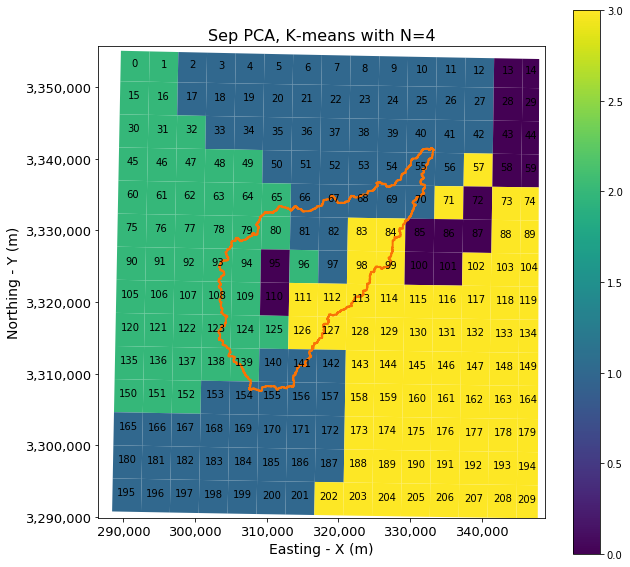

In [107]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdSepCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 1
- Current cluster 1 -> Region_Id 4
- Current cluster 2 -> Region_Id 3
- Current cluster 3 -> Region_Id 2

In [108]:
MapDict = { 0 : 1,
            1 : 4,
            2 : 3,
            3 : 2 }

In [109]:
gpdSepCluster[NColN] = gpdSepCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

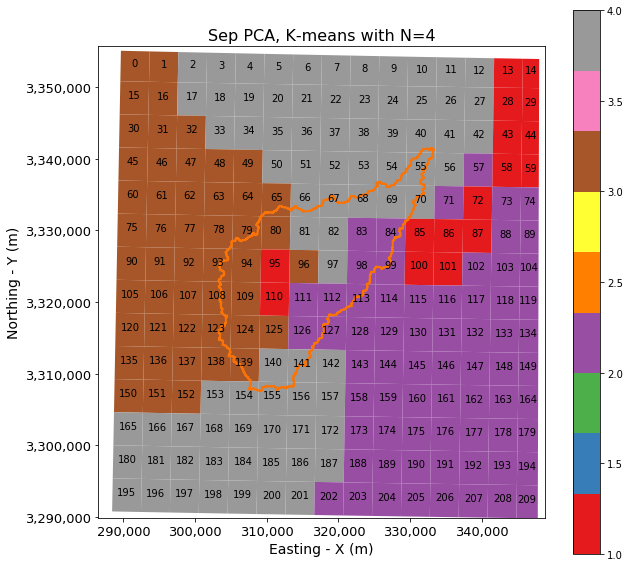

In [110]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdSepCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [111]:
# make the manual changes
gpdSepCluster.at[57, NColN] = 1
gpdSepCluster.at[56, NColN] = 1
gpdSepCluster.at[71, NColN] = 1
gpdSepCluster.at[95, NColN] = 3
gpdSepCluster.at[110, NColN] = 3

In [112]:
# add the Grid Id
gpdSepCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

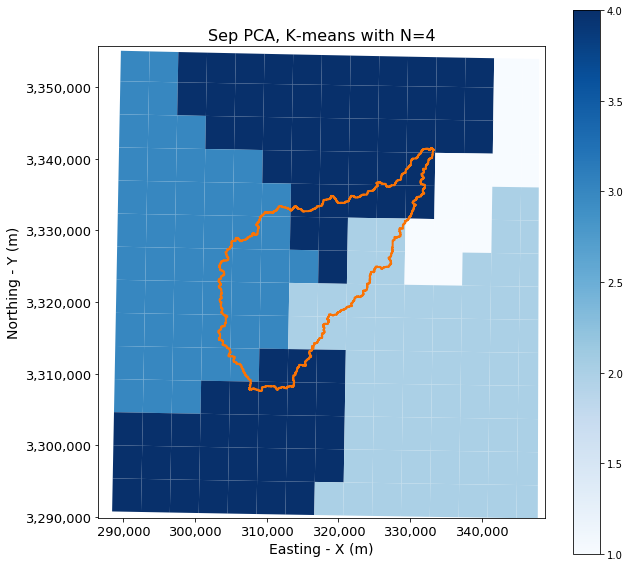

In [113]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdSepCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [114]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Sep_4Regions.shp" ) )
gpdSepCluster[OutShpCols].to_file( OutShp )

### October

In [115]:
gpdOctCluster[NColN] = gpdOctCluster[KeepCols[0]]
gpdOctCluster[NamCoord] = gpdOctCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

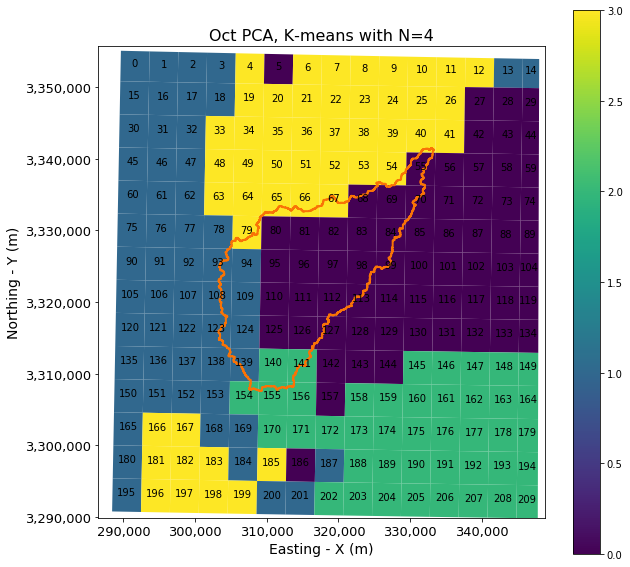

In [116]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdOctCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 1
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 2
- Current cluster 3 -> Region_Id 4

In [117]:
MapDict = { 0 : 1,
            1 : 3,
            2 : 2,
            3 : 4 }

In [118]:
gpdOctCluster[NColN] = gpdOctCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

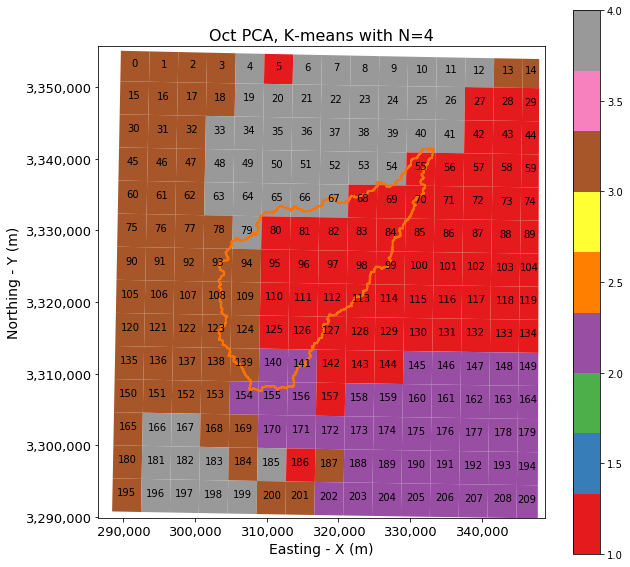

In [119]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdOctCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [120]:
# make the manual changes
gpdOctCluster.at[13, NColN] = 1
gpdOctCluster.at[14, NColN] = 1
gpdOctCluster.at[5, NColN] = 4
gpdOctCluster.at[185, NColN] = 2
gpdOctCluster.at[186, NColN] = 2
gpdOctCluster.at[187, NColN] = 2
gpdOctCluster.at[200, NColN] = 2
gpdOctCluster.at[201, NColN] = 2
gpdOctCluster.at[166, NColN] = 3
gpdOctCluster.at[167, NColN] = 3
gpdOctCluster.at[181, NColN] = 3
gpdOctCluster.at[182, NColN] = 3
gpdOctCluster.at[183, NColN] = 3
gpdOctCluster.at[196, NColN] = 3
gpdOctCluster.at[197, NColN] = 3
gpdOctCluster.at[198, NColN] = 3
gpdOctCluster.at[199, NColN] = 3

In [121]:
# add the Grid Id
gpdOctCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

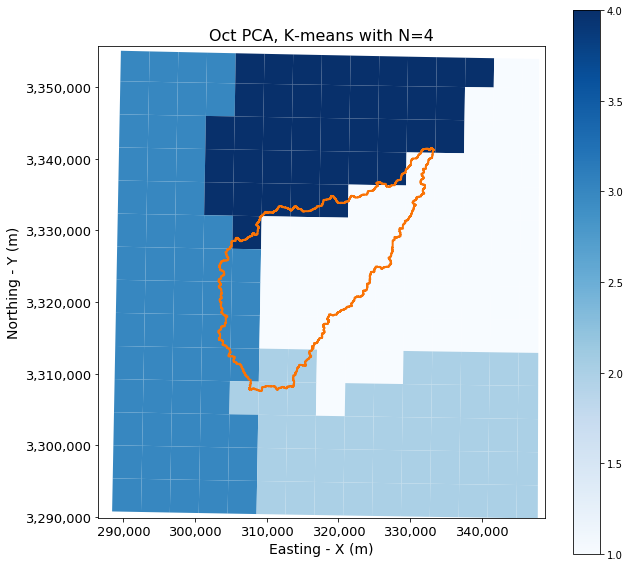

In [122]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdOctCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [123]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Oct_4Regions.shp" ) )
gpdOctCluster[OutShpCols].to_file( OutShp )

### November

In [124]:
gpdNovCluster[NColN] = gpdNovCluster[KeepCols[0]]
gpdNovCluster[NamCoord] = gpdNovCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

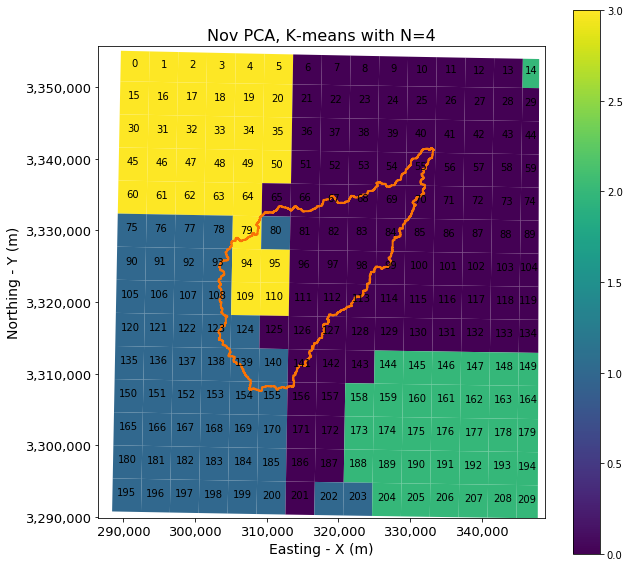

In [125]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdNovCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdNovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 1
- Current cluster 1 -> Region_Id 3
- Current cluster 2 -> Region_Id 2
- Current cluster 3 -> Region_Id 4

In [126]:
MapDict = { 0 : 1,
            1 : 3,
            2 : 2,
            3 : 4 }

In [127]:
gpdNovCluster[NColN] = gpdNovCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

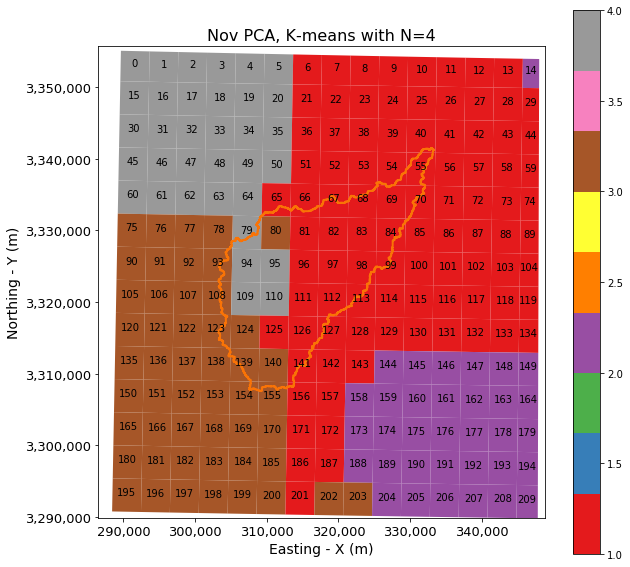

In [128]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdNovCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdNovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [129]:
# make the manual changes
gpdNovCluster.at[14, NColN] = 1
gpdNovCluster.at[202, NColN] = 2
gpdNovCluster.at[203, NColN] = 2
gpdNovCluster.at[80, NColN] = 4

In [130]:
# add the Grid Id
gpdNovCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

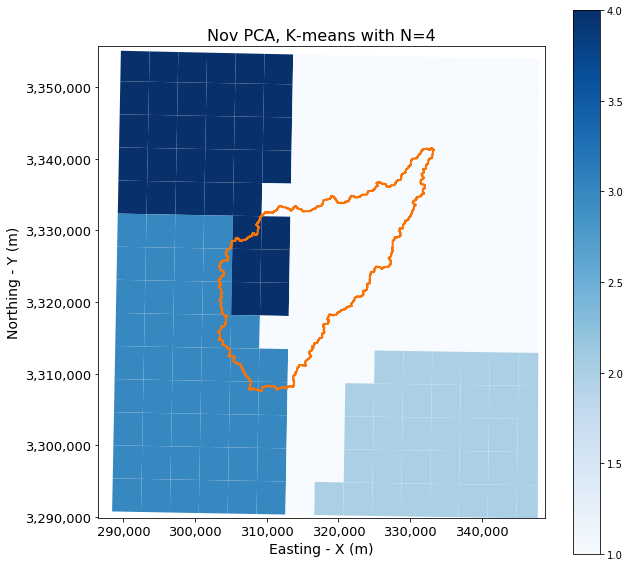

In [131]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdNovCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [132]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Nov_4Regions.shp" ) )
gpdNovCluster[OutShpCols].to_file( OutShp )

### December

In [133]:
gpdDecCluster[NColN] = gpdDecCluster[KeepCols[0]]
gpdDecCluster[NamCoord] = gpdDecCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

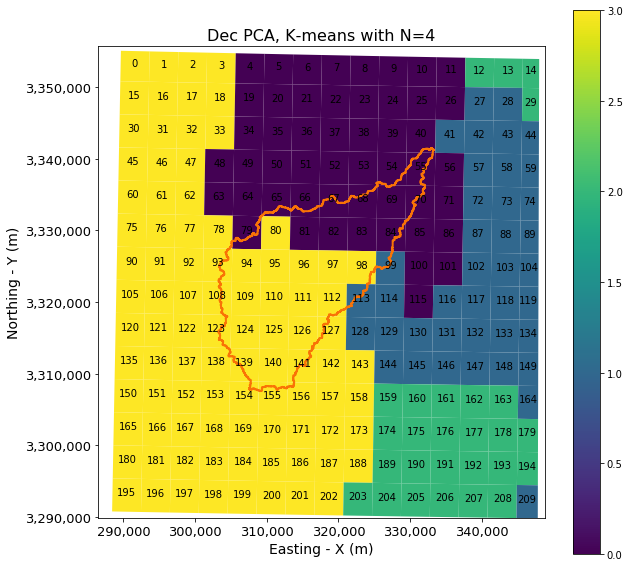

In [134]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdDecCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdDecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

- Current cluster 0 -> Region_Id 4
- Current cluster 1 -> Region_Id 1
- Current cluster 2 -> Region_Id 2
- Current cluster 3 -> Region_Id 3

In [135]:
MapDict = { 0 : 4,
            1 : 1,
            2 : 2,
            3 : 3 }

In [136]:
gpdDecCluster[NColN] = gpdDecCluster.apply( lambda row: ReplLam(row[KeepCols[0]]), axis=1 )

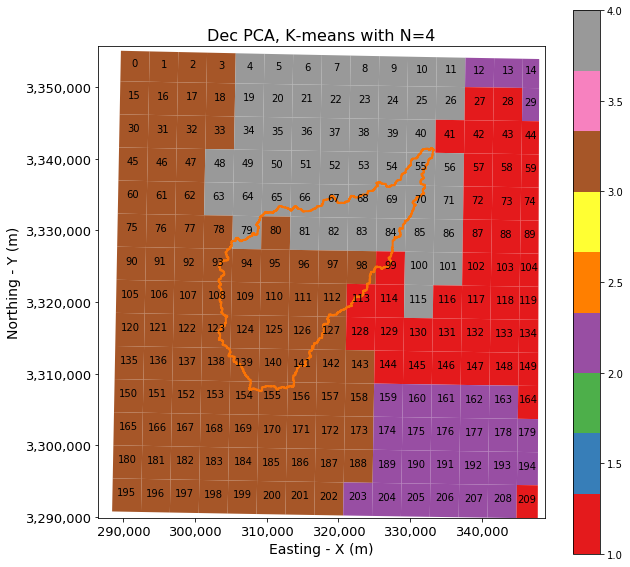

In [137]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdDecCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdDecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [138]:
# make the manual changes
gpdDecCluster.at[12, NColN] = 1
gpdDecCluster.at[13, NColN] = 1
gpdDecCluster.at[14, NColN] = 1
gpdDecCluster.at[29, NColN] = 1
gpdDecCluster.at[209, NColN] = 2

In [139]:
# add the Grid Id
gpdDecCluster["Grid_Id"] = np.array( GridIDList, dtype=np.int32 )

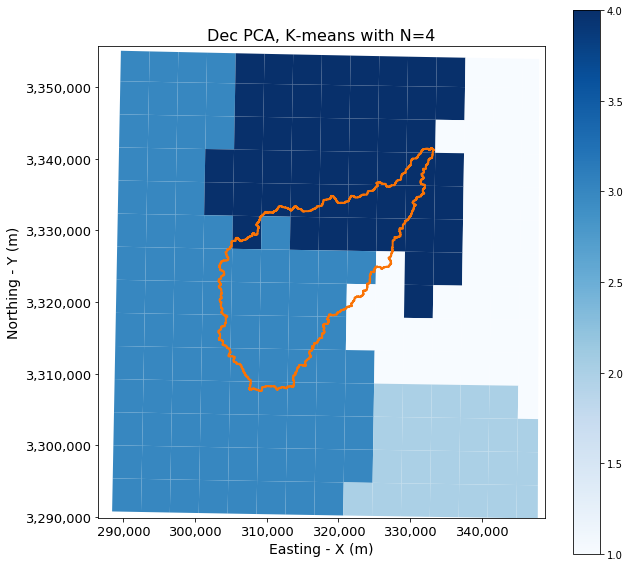

In [140]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdDecCluster.plot(column=NColN, ax=ax11, cmap='Blues', legend=True )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [141]:
OutShp = os.path.normpath( os.path.join( IN_DIR, "Dec_4Regions.shp" ) )
gpdDecCluster[OutShpCols].to_file( OutShp )

## Output Results and Prepare for R

Next, prepare an output array for each month to be used in R analysis. To do this, add the *Region_Id* from the cluster clean-up to the existing precipitation depth by grid cell.

### Jan

In [142]:
display( HTML( gpdJanCluster.head().to_html() ) )

,K-Means_4,geometry,Region_Id,coords,Grid_Id
0,3,"POLYGON ((289652.464 3355071.069, 293659.782 3354982.047, 293579.718 3350745.580, 289570.602 3350822.040, 289652.464 3355071.069))",4,"[(291615.5740674287, 3352902.0437288033)]",662328
1,3,"POLYGON ((293659.782 3354982.047, 297667.056 3354894.499, 297588.781 3350670.593, 293579.718 3350745.580, 293659.782 3354982.047))",4,"[(295623.76790861983, 3352820.0396473967)]",662329
2,3,"POLYGON ((297667.056 3354894.499, 301674.285 3354808.425, 301597.790 3350597.079, 297588.781 3350670.593, 297667.056 3354894.499))",4,"[(299631.9128720951, 3352739.5089865047)]",662330
3,3,"POLYGON ((301674.285 3354808.425, 305681.472 3354723.824, 305606.747 3350525.037, 301597.790 3350597.079, 301674.285 3354808.425))",4,"[(303640.01000519295, 3352660.451603353)]",662331
4,3,"POLYGON ((305681.472 3354723.824, 309688.618 3354640.698, 309615.654 3350454.467, 305606.747 3350525.037, 305681.472 3354723.824))",4,"[(307648.0603553024, 3352582.867357904)]",662332


In [143]:
JoinCols = [ "Grid_Id", "Region_Id" ]

In [144]:
JanPCKF = os.path.normpath( os.path.join( IN_DIR2, "January_WetDays_1981-2010.pickle" ) )
JanDF = pd.read_pickle( JanPCKF )

In [145]:
display( HTML( JanDF.head().to_html() ) )

,Grid_Id,Precip_mm
0,662328,1.31
1,662328,7.96
2,662328,0.32
3,662328,0.70
4,662328,1.08


In [146]:
JanGroupDF = JanDF.merge( gpdJanCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )

In [147]:
display( HTML( JanGroupDF.head().to_html() ) )

,Grid_Id,Precip_mm,Region_Id
0,662328,1.31,4
1,662328,7.96,4
2,662328,0.32,4
3,662328,0.70,4
4,662328,1.08,4


In [148]:
JanPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDays_Grp_1981-2010.pickle" ) )
JanGroupDF.to_pickle( JanPCKF )
JanFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDays_Grp_1981-2010.feather" ) )
JanGroupDF.to_feather( JanFeatherF )

### Feb

In [149]:
FebPCKF = os.path.normpath( os.path.join( IN_DIR2, "February_WetDays_1981-2010.pickle" ) )
FebDF = pd.read_pickle( FebPCKF )
FebGroupDF = FebDF.merge( gpdFebCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
FebPCKF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDays_Grp_1981-2010.pickle" ) )
FebGroupDF.to_pickle( FebPCKF )
FebFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDays_Grp_1981-2010.feather" ) )
FebGroupDF.to_feather( FebFeatherF )

### Mar

In [150]:
MarPCKF = os.path.normpath( os.path.join( IN_DIR2, "March_WetDays_1981-2010.pickle" ) )
MarDF = pd.read_pickle( MarPCKF )
MarGroupDF = MarDF.merge( gpdMarCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
MarPCKF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDays_Grp_1981-2010.pickle" ) )
MarGroupDF.to_pickle( MarPCKF )
MarFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDays_Grp_1981-2010.feather" ) )
MarGroupDF.to_feather( MarFeatherF )

### Apr

In [151]:
AprPCKF = os.path.normpath( os.path.join( IN_DIR2, "April_WetDays_1981-2010.pickle" ) )
AprDF = pd.read_pickle( AprPCKF )
AprGroupDF = AprDF.merge( gpdAprCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
AprPCKF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDays_Grp_1981-2010.pickle" ) )
AprGroupDF.to_pickle( AprPCKF )
AprFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDays_Grp_1981-2010.feather" ) )
AprGroupDF.to_feather( AprFeatherF )

### May

In [152]:
MayPCKF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_1981-2010.pickle" ) )
MayDF = pd.read_pickle( MayPCKF )
MayGroupDF = MayDF.merge( gpdMayCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
MayPCKF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_Grp_1981-2010.pickle" ) )
MayGroupDF.to_pickle( MayPCKF )
MayFeatherF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_Grp_1981-2010.feather" ) )
MayGroupDF.to_feather( MayFeatherF )

### Jun

In [153]:
JunPCKF = os.path.normpath( os.path.join( IN_DIR2, "June_WetDays_1981-2010.pickle" ) )
JunDF = pd.read_pickle( JunPCKF )
JunGroupDF = JunDF.merge( gpdJunCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
JunPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDays_Grp_1981-2010.pickle" ) )
JunGroupDF.to_pickle( JunPCKF )
JunFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDays_Grp_1981-2010.feather" ) )
JunGroupDF.to_feather( JunFeatherF )

### Jul

In [154]:
JulPCKF = os.path.normpath( os.path.join( IN_DIR2, "July_WetDays_1981-2010.pickle" ) )
JulDF = pd.read_pickle( JulPCKF )
JulGroupDF = JulDF.merge( gpdJulCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
JulPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDays_Grp_1981-2010.pickle" ) )
JulGroupDF.to_pickle( JulPCKF )
JulFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDays_Grp_1981-2010.feather" ) )
JulGroupDF.to_feather( JulFeatherF )

### Aug

In [155]:
AugPCKF = os.path.normpath( os.path.join( IN_DIR2, "August_WetDays_1981-2010.pickle" ) )
AugDF = pd.read_pickle( AugPCKF )
AugGroupDF = AugDF.merge( gpdAugCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
AugPCKF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDays_Grp_1981-2010.pickle" ) )
AugGroupDF.to_pickle( AugPCKF )
AugFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDays_Grp_1981-2010.feather" ) )
AugGroupDF.to_feather( AugFeatherF )

### Sep

In [156]:
SepPCKF = os.path.normpath( os.path.join( IN_DIR2, "September_WetDays_1981-2010.pickle" ) )
SepDF = pd.read_pickle( SepPCKF )
SepGroupDF = SepDF.merge( gpdSepCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
SepPCKF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDays_Grp_1981-2010.pickle" ) )
SepGroupDF.to_pickle( SepPCKF )
SepFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDays_Grp_1981-2010.feather" ) )
SepGroupDF.to_feather( SepFeatherF )

### Oct

In [157]:
OctPCKF = os.path.normpath( os.path.join( IN_DIR2, "October_WetDays_1981-2010.pickle" ) )
OctDF = pd.read_pickle( OctPCKF )
OctGroupDF = OctDF.merge( gpdOctCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
OctPCKF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDays_Grp_1981-2010.pickle" ) )
OctGroupDF.to_pickle( OctPCKF )
OctFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDays_Grp_1981-2010.feather" ) )
OctGroupDF.to_feather( OctFeatherF )

### Nov

In [158]:
NovPCKF = os.path.normpath( os.path.join( IN_DIR2, "November_WetDays_1981-2010.pickle" ) )
NovDF = pd.read_pickle( NovPCKF )
NovGroupDF = NovDF.merge( gpdNovCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
NovPCKF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDays_Grp_1981-2010.pickle" ) )
NovGroupDF.to_pickle( NovPCKF )
NovFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDays_Grp_1981-2010.feather" ) )
NovGroupDF.to_feather( NovFeatherF )

### Dec

In [159]:
DecPCKF = os.path.normpath( os.path.join( IN_DIR2, "December_WetDays_1981-2010.pickle" ) )
DecDF = pd.read_pickle( DecPCKF )
DecGroupDF = DecDF.merge( gpdDecCluster[JoinCols], how='inner', left_on=JoinCols[0], 
                          right_on=JoinCols[0], )
DecPCKF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDays_Grp_1981-2010.pickle" ) )
DecGroupDF.to_pickle( DecPCKF )
DecFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDays_Grp_1981-2010.feather" ) )
DecGroupDF.to_feather( DecFeatherF )